<a href="https://colab.research.google.com/github/Shubhangiwaghmare7/Data-Science/blob/main/FmnistDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [23]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [25]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

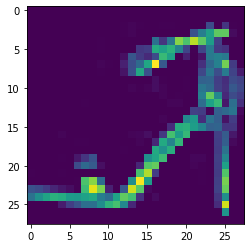

In [26]:
#visualization of data
plt.imshow(X_train[8])

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
#normalizing the data (0,1)
#pixel=0.255
X_train,X_test=X_train/255.0,X_test/255.0

In [29]:
X_train,X_test=X_train.reshape(60000,28,28,1),X_test.reshape(10000,28,28,1)

In [30]:
#model architecture
model= Sequential()

model.add(Conv2D(32,3,activation='relu',padding='same',kernel_initializer='he_uniform'))#Con Layer 1
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform'))#Con Layer 2
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_uniform'))#Con Layer 3
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))


In [31]:
model.compile('SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(X_train,y_train,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3682 - accuracy: 0.8744
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3531 - accuracy: 0.8788
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3433 - accuracy: 0.8828
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3338 - accuracy: 0.8862
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3215 - accuracy: 0.8898
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3145 - accuracy: 0.8917
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3074 - accuracy: 0.8955
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2982 - accuracy: 0.8972
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2900 - accuracy: 0.8994
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.283

In [34]:
y_pred=model.predict(X_test)
y_pred

array([[8.03637548e-08, 3.12063548e-07, 1.45326908e-07, ...,
        2.30492861e-03, 4.51897648e-07, 9.97608900e-01],
       [9.53538620e-05, 2.19998242e-07, 9.97051597e-01, ...,
        1.00373214e-07, 8.31672514e-06, 4.93130443e-08],
       [7.51768812e-06, 9.99967813e-01, 3.43827583e-06, ...,
        6.84968029e-08, 1.07157483e-09, 4.14581756e-08],
       ...,
       [6.05411988e-05, 6.99964864e-10, 1.35035361e-06, ...,
        1.82417425e-05, 9.99892592e-01, 1.67111537e-07],
       [8.27367330e-06, 9.99940515e-01, 4.22257608e-06, ...,
        8.50469775e-08, 1.43372514e-09, 2.29956321e-08],
       [3.45676468e-04, 3.72212162e-05, 4.81354800e-04, ...,
        2.13656679e-01, 1.39229465e-03, 9.86173865e-04]], dtype=float32)

In [35]:
y_pred[2]

array([7.5176881e-06, 9.9996781e-01, 3.4382758e-06, 2.0071100e-05,
       4.8277815e-07, 1.3645256e-07, 4.6538437e-07, 6.8496803e-08,
       1.0715748e-09, 4.1458176e-08], dtype=float32)

In [37]:
np.argmax(y_pred[2])

1

In [38]:
y_test[2]

1